In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import IPython.display as ipd


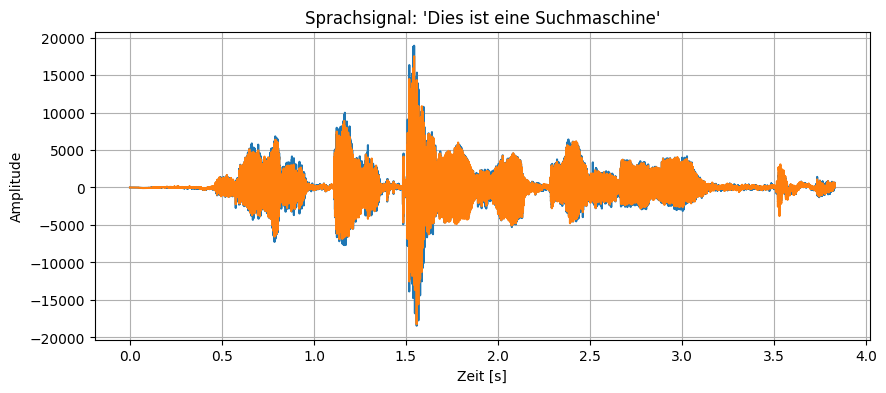

In [10]:

# Laden der Audio-Datei
sample_rate, audio = read("Aufzeichnung.wav")

# Plotten des Sprachsignals
time = np.linspace(0., len(audio) / sample_rate, len(audio))
plt.figure(figsize=(10, 4))
plt.plot(time, audio)
plt.title("Sprachsignal: 'Dies ist eine Suchmaschine'")
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



# Audio-Datei einlesen und abspielen
ipd.Audio("Aufzeichnung.wav")

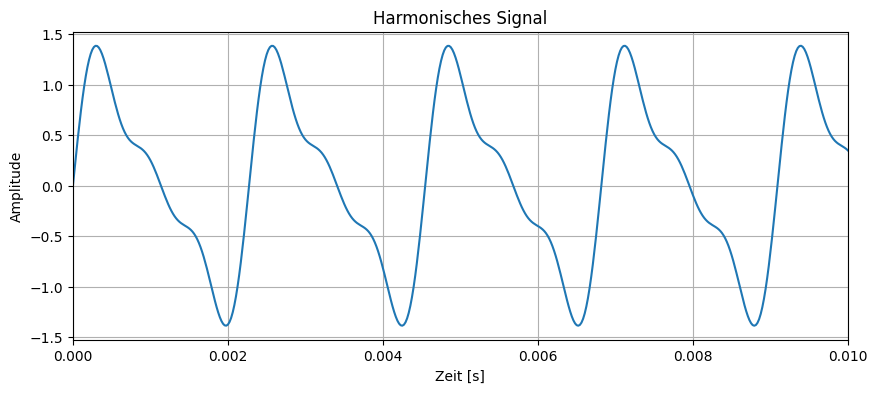

In [14]:

# Harmonisches Signal erzeugen
f0 = 440  # Grundfrequenz
A = 1.0
T = 1.0  # Dauer in Sekunden
t = np.linspace(0, T, int(sample_rate * T), endpoint=False)
signal = A * (np.sin(2 * np.pi * f0 * t) + 
              0.5 * np.sin(2 * np.pi * 2 * f0 * t) + 
              0.25 * np.sin(2 * np.pi * 3 * f0 * t))

# Speichern
write("harmonisch.wav", sample_rate, signal.astype(np.float32))

# Plotten des Oszillogramms
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlim(0,0.01)
plt.title("Harmonisches Signal")
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Audio abspielen
ipd.display(ipd.Audio(signal, rate=sample_rate))

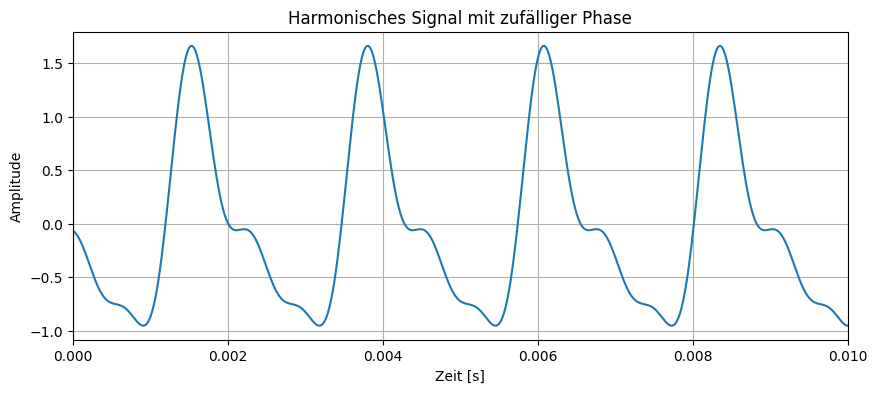

In [30]:

# Phase der Einzeltöne zufällig verändern
random_phase = np.random.uniform(0, 2 * np.pi, 3)
signal_random_phase = A * (np.sin(2 * np.pi * f0 * t + random_phase[0]) + 
                           0.5 * np.sin(2 * np.pi * 2 * f0 * t + random_phase[1]) + 
                           0.25 * np.sin(2 * np.pi * 3 * f0 * t + random_phase[2]))

# Plotten
write("harmonisch_random_phase.wav", sample_rate, signal_random_phase.astype(np.float32))

plt.figure(figsize=(10, 4))
plt.plot(t, signal_random_phase)
plt.xlim(0,0.01)
plt.title("Harmonisches Signal mit zufälliger Phase")
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Audio abspielen
ipd.display(ipd.Audio(signal_random_phase, rate=sample_rate))

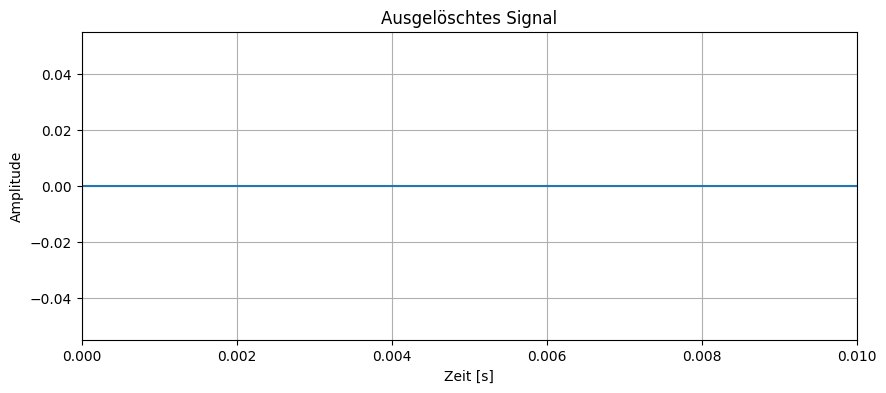

In [33]:

# Kammerton auslöschen
anti_signal = -signal
combined_signal = signal + anti_signal

write("ausgelöscht.wav", sample_rate, combined_signal.astype(np.float32))

plt.figure(figsize=(10, 4))
plt.plot(t, combined_signal)
plt.xlim(0,0.01)
plt.title("Ausgelöschtes Signal")
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Audio abspielen
ipd.display(ipd.Audio(combined_signal, rate=sample_rate))

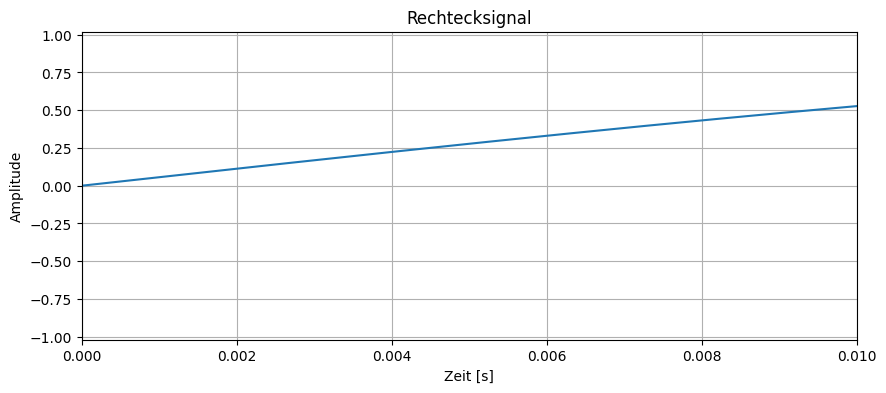

In [35]:

# Rechtecksignal durch Überlagerung von Harmonischen
f_rect = 1
T_rect = 1 / f_rect
t_rect = np.linspace(0, T_rect, int(sample_rate * T_rect), endpoint=False)
rect_signal = sum([np.sin(2 * np.pi * (2 * k - 1) * f_rect * t_rect) / (2 * k - 1) for k in range(1, 10)])

write("rechteck.wav", sample_rate, rect_signal.astype(np.float32))

plt.figure(figsize=(10, 4))
plt.plot(t_rect, rect_signal)
plt.xlim(0,0.01)
plt.title("Rechtecksignal")
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Audio abspielen
ipd.display(ipd.Audio(rect_signal, rate=sample_rate))

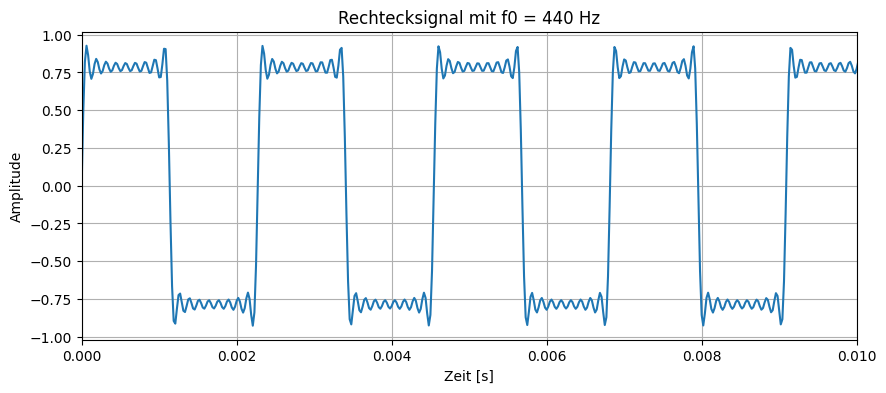

In [37]:

# Klingen einer periodischen Rechteckfunktion mit f0 = 440 Hz
t_rect_440 = np.linspace(0, 1, sample_rate, endpoint=False)
rect_signal_440 = sum([np.sin(2 * np.pi * (2 * k - 1) * 440 * t_rect_440) / (2 * k - 1) for k in range(1, 10)])

write("rechteck_440.wav", sample_rate, rect_signal_440.astype(np.float32))

plt.figure(figsize=(10, 4))
plt.plot(t_rect_440, rect_signal_440)
plt.xlim(0,0.01)
plt.title("Rechtecksignal mit f0 = 440 Hz")
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Audio abspielen
ipd.display(ipd.Audio(rect_signal_440, rate=sample_rate))
